**Importing Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing Data**

In [26]:
data=pd.read_csv('http://bit.ly/w-data')
print("data imported successfully")

data imported successfully


**Manipulating Data**

In [27]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [29]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [30]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**Visualizing the data**

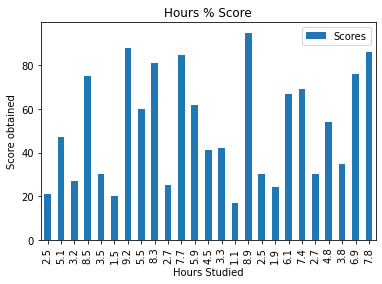

In [32]:
data.plot(x='Hours',y='Scores',kind='bar')
plt.title('Hours % Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score obtained')
plt.show()

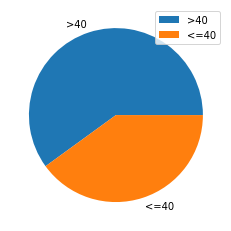

In [36]:
scores=data.iloc[:,1].values
count=[0,0]
for i in scores:
  if i>40:
    count[0]+=1
  else:
    count[1]+=1
count=np.array(count)
mylabels=[">40","<=40"]
plt.pie(count,labels=mylabels)
plt.legend()
plt.title("Students classification")
plt.show()
  

**preparing data**

In [41]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
print(X.shape)
print(Y.shape)


(25, 1)
(25,)


In [48]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.25,random_state=0)

In [49]:
print(X_train.shape,end=' ')
print(X_test.shape)

(18, 1) (7, 1)


**Training the model**



In [58]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
print("Training ...")
regressor.fit(X_train,Y_train)
print("Training is done")

Training ...
Training is done


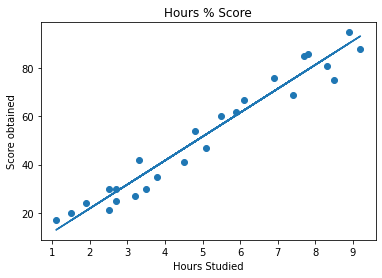

In [59]:
regressionLine=regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,regressionLine)
plt.title('Hours % Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score obtained')
plt.show()


**Making Predictions**

In [60]:
Y_pred=regressor.predict(X_test)
comp=pd.DataFrame({'Acual':Y_test,'Predicted':Y_pred})
comp

,Acual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


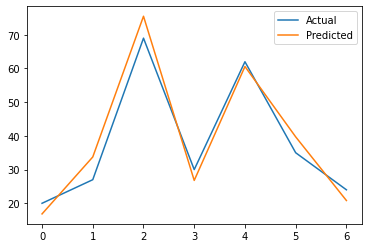

In [61]:
plt.plot(comp)
plt.legend(["Actual","Predicted"])
plt.show()

In [64]:
hours=np.array(9.25).reshape(-1,1)
prediction=regressor.predict(hours)
print("predicted score for {} hours is {}".format(hours,prediction[0]))

predicted score for [[9.25]] hours is 93.89272889341652


**Evaluating the model**

In [87]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error :  5.6239285714285705


**Trying Random Forest Regressor**

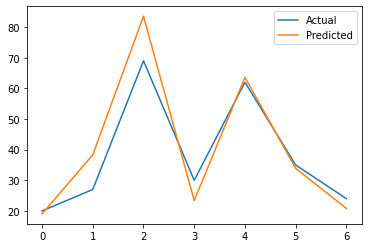

predicted score for 9.25 hours is 93.89272889341652
Mean Absolute Error :  5.6239285714285705


In [86]:
from sklearn.ensemble import RandomForestRegressor
impModel=RandomForestRegressor(random_state=1)
impModel.fit(X_train,Y_train)
Y_pred=impModel.predict(X_test)
comp=pd.DataFrame({'Acual':Y_test,'Predicted':Y_pred})
plt.plot(comp)
plt.legend(["Actual","Predicted"])
plt.show()
hours=np.array(9.25).reshape(-1,1)
prediction=regressor.predict(hours)
print("predicted score for {} hours is {}".format(hours[0][0],prediction[0]))
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,Y_pred))
